In [17]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

sns.set()
np.random.seed(101)
plt.rcParams['figure.figsize'] = (11.0, 8.0)

# Bayesian Linear Regression

## 仮定

- 真の関数:  &nbsp; $sin(x)$
- 今回は３次の項&nbsp; $\phi(x)=(1, x, x^{2}, x^{3})$ を使う

## Distributions

- $p(\mathbf{w}) = N(\mathbf{w}|0, \sigma_{w}^{2}\mathbf{I})$
- $p(y_{n}|x_{n}, \mathbf{w})=N(y_{n}|\mathbf{w}^{T}\phi(x_{n}), \sigma_{y}^{2})$

## Hyperparameters

- $\sigma_{w}^{2} = 0.1$
- $\sigma_{y}^{2} = 0.1$

In [31]:
# Generate data
x_min, x_max = -4, 4
x = x_min + (x_max - x_min) * np.random.rand(11)
y = np.sin(x) + np.random.multivariate_normal(np.zeros_like(x), 0.1*np.eye(len(x)))

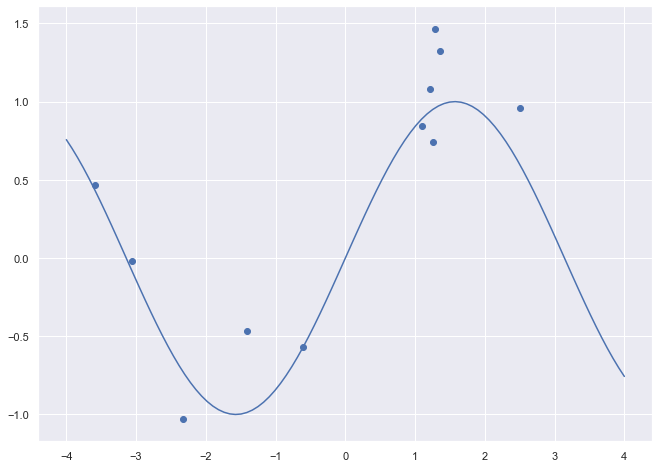

In [32]:
# True function
xs = np.linspace(-4, 4, 100)
true_ys = np.sin(xs)
true_ys -= np.mean(true_ys)

# Plot
plt.plot(xs, true_ys)
plt.scatter(x, y)

In [33]:
x = x.reshape(-1, 1)
poly = PolynomialFeatures(3)
phi_x = poly.fit_transform(x)

In [34]:
var_y = 0.1
var_w = 0.1
degree = 3
y = y.reshape(-1, 1)

## Posterior Distribution
事前分布にガウス分布を設定すると、事後分布もガウス分布
<br>
<br>
$$p(\mathbf{w}|\mathbf{X}, \mathbf{Y})= N(\mathbf{w}|\boldsymbol{\hat \mu}, \boldsymbol{\hat \Sigma})$$
<br>
ただし

$$\boldsymbol{\hat \Sigma}^{-1}=\sigma_{y}^{-2}\sum_{n=1}^{N}\phi(x_{n})\phi(x_{n})^{T}+\sigma_{w}^{-2}\mathbf{I}$$
$$\boldsymbol{\hat \mu} = \boldsymbol{\hat \Sigma}\hat  \sigma_{y}^{-2}\sum_{n=1}^{N}\phi(x_{n})y_{n}$$

In [35]:
posterior_sigma_inv = (1 / var_y**2) * np.dot(phi_x.T, phi_x) + (1 / var_w**2) * np.eye(degree+1)
posterior_sigma = np.linalg.inv(posterior_sigma_inv)
posterior_mu = (1 / var_y**2) * posterior_sigma @ np.dot(phi_x.T, y)

In [36]:
# Sample from posterior
size = 10 
samples = np.random.multivariate_normal(posterior_mu.ravel(), posterior_sigma, size=10)

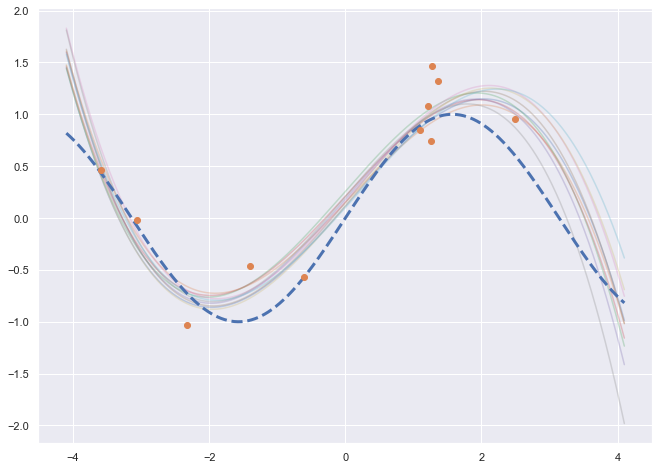

In [37]:
xs = np.linspace(x_min-0.1, x_max+0.1, 1000).reshape(-1, 1)
true_y = np.sin(xs)

poly2 = PolynomialFeatures(3)
phi_x_new = poly2.fit_transform(xs)

for i in range(size):
    sample_prior = np.dot(phi_x_new, samples[i])
    plt.plot(xs, sample_prior, '-', alpha=0.3)

plt.plot(xs, true_y, '--', lw=3)
plt.plot(x, y, 'o')

## Predictive distribution
新たな入力値 &thinsp;$(y^*, \mathbf{x^*})$ &thinsp; に対する予測分布
<br>
<br>
$$p(y^*|\mathbf{x^*}, \mathbf{Y}, \mathbf{X})=N(y^*|\mu(\mathbf{x^*}), \sigma^2_{*}(\mathbf{x^*}))$$

In [38]:
pred_mean = phi_x_new @ posterior_mu
pred_sigma = np.diag(var_y + phi_x_new @ posterior_sigma @ phi_x_new.T)

In [39]:
pred_sigma.shape, pred_mean.shape

((1000,), (1000, 1))

(1000, 1) (1000,) (1000,) (1000,)


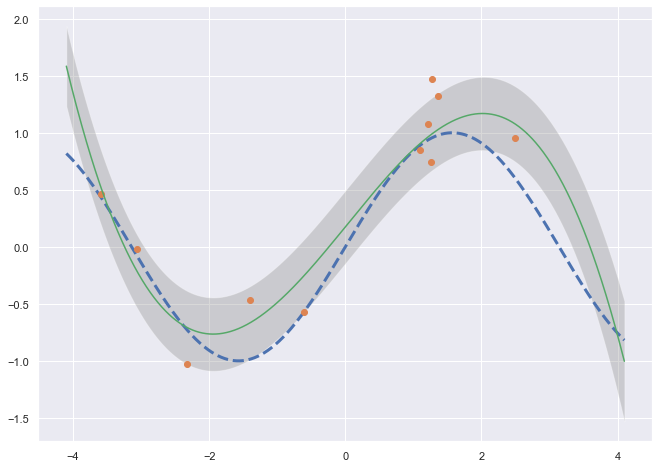

In [40]:
plt.plot(xs, true_y, '--', lw=3)
plt.plot(x, y, 'o')
plt.plot(xs, pred_mean)

pred_mean = pred_mean.reshape(-1)
std = np.sqrt(pred_sigma)
lb = pred_mean - std
ub = pred_mean + std

print(xs.shape, std.shape, lb.shape, ub.shape)
plt.fill_between(np.squeeze(xs), lb, ub, facecolor='gray',alpha=0.3)

In [15]:
np.squeeze(xs).shape

(1000,)